# Analyzing Google Play


### Objective:

The objective of this analysis is to provide actionable insights for driving expansion and user retention in the Android app market. By dissecting app categories, examining user sentiment through ratings and reviews, analyzing download and install metrics, scrutinizing monetization strategies, understanding user demographics, conducting competitive analysis, and leveraging user engagement metrics, our aim is to empower stakeholders with the knowledge to navigate the complexities of the Android app market successfully. These insights will enable stakeholders to make informed decisions, optimize revenue streams, amplify user engagement, and foster growth and success in the competitive landscape of mobile applications.


### Problem Statement:

In the dynamic Android app market, understanding app market dynamics is crucial for developers and stakeholders to make informed decisions. Leveraging data analytics, visualization, and enhanced interpretation skills, this project aims to gain in-depth insights into the Google Play Store data. The following objectives will be addressed

In [1]:
#import library
import pandas as pd

In [2]:
df=pd.read_csv("apps.csv")
df

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9654,10836,Sya9a Maroc - FR,FAMILY,4.5,38,53.0,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
9655,10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6,100+,Free,0,Everyone,Education,"July 6, 2018",1,4.1 and up
9656,10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1,2.2 and up
9657,10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,NaN,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [3]:
# Drop duplicates
apps = df.drop_duplicates()
# Print the total number of apps
print('Total number of apps in the dataset = ', len(apps))

Total number of apps in the dataset =  9659


In [4]:
# Have a look at a random sample of 5 rows
n = 5
apps.sample(n)

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2743,3477,Google Docs,PRODUCTIVITY,4.3,815981,NaN,"100,000,000+",Free,0,Everyone,Productivity,"August 6, 2018",Varies with device,Varies with device
8775,9929,EU Brazil Green Business Forum,PRODUCTIVITY,NaN,0,8.7,10+,Free,0,Everyone,Productivity,"April 18, 2017",1.7.1,2.1 and up
5479,6490,MbH BM,MEDICAL,1.0,1,2.3,100+,Free,0,Everyone,Medical,"December 14, 2016",1.1.3,4.3 and up
7946,9065,Sokoban Land DX,FAMILY,3.9,46,20.0,"10,000+",Paid,$2.99,Everyone,Puzzle,"January 29, 2018",1.0.6,2.3 and up
1756,2254,EMT Review Plus,MEDICAL,4.5,199,1.8,"10,000+",Paid,$11.99,Everyone,Medical,"June 27, 2018",3.0.5,4.4W and up


### Data Cleaning

In [5]:
import matplotlib.pyplot as plt

# List of column names to clean
cols_to_clean = ['Installs', 'Size', 'Price']

# Loop for each column
for col in cols_to_clean:
    # Check the data type of the column
    if apps[col].dtype != "object":
        apps[col] = apps[col].astype(str)

# Clean the data
for col in cols_to_clean:
    apps[col] = apps[col].str.replace(r"[+,M]", "", regex=True)

# Print the cleaned data types
for col in cols_to_clean:
    print(f"Data type of {col}: {apps[col].dtype}")

Data type of Installs: object
Data type of Size: object
Data type of Price: object


### Exploring app categories
    With over 1 billion active users across 190 countries, Google Play remains a vital platform for app distribution, offering global reach. To enhance app discoverability, Google has introduced app categorization.

    This prompts several questions:

    ~Which category holds the largest market share?
    ~Is there a dominant category?
    ~Which categories have the fewest apps?
    
    Our dataset contains 33 unique categories. Family and Game apps are most prevalent, followed by Tools, Business, and Medical apps.

Number of categories =  33
Apps per category:
FAMILY                 1832
GAME                    959
TOOLS                   827
BUSINESS                420
MEDICAL                 395
PERSONALIZATION         376
PRODUCTIVITY            374
LIFESTYLE               369
FINANCE                 345
SPORTS                  325
COMMUNICATION           315
HEALTH_AND_FITNESS      288
PHOTOGRAPHY             281
NEWS_AND_MAGAZINES      254
SOCIAL                  239
BOOKS_AND_REFERENCE     222
TRAVEL_AND_LOCAL        219
SHOPPING                202
DATING                  171
VIDEO_PLAYERS           163
MAPS_AND_NAVIGATION     131
EDUCATION               119
FOOD_AND_DRINK          112
ENTERTAINMENT           102
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       84
WEATHER                  79
HOUSE_AND_HOME           74
EVENTS                   64
ART_AND_DESIGN           64
PARENTING                60
COMICS                   56
BEAUTY                   53
Name: Category, dtype: int64


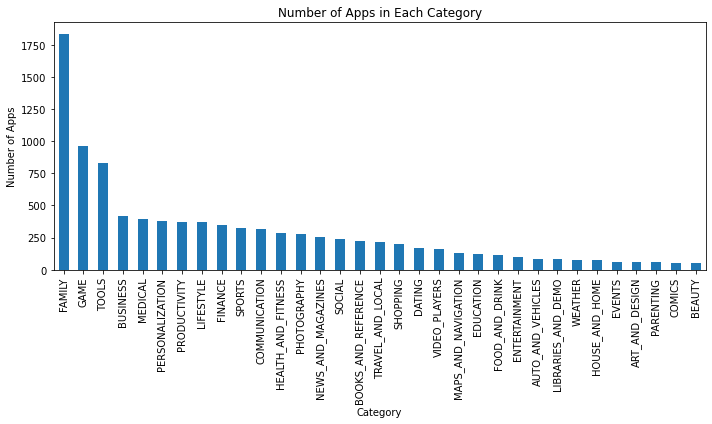

In [6]:
import matplotlib.pyplot as plt

try:
    # Assuming 'apps' DataFrame is properly loaded and contains the necessary data
    # Assuming 'apps' DataFrame has a column named 'Category'

    # Print the total number of unique categories
    num_categories = len(apps['Category'].unique())
    print('Number of categories = ', num_categories)

    # Count the number of apps in each 'Category' and sort them in descending order
    num_apps_in_category = apps['Category'].value_counts().sort_values(ascending=False)

    # Print the number of apps in each category
    print('Apps per category:')
    print(num_apps_in_category)

    # Plotting
    plt.figure(figsize=(10, 6))
    num_apps_in_category.plot(kind='bar')
    plt.title('Number of Apps in Each Category')
    plt.xlabel('Category')
    plt.ylabel('Number of Apps')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

except Exception as e:
    print("Error:", e)

### Distribution of app ratings
After having witnessed the market share for each category of apps, let's see how all these apps perform on an average. App ratings (on a scale of 1 to 5) impact the discoverability, conversion of apps as well as the company's overall brand image. Ratings are a key performance indicator of an app.

From our research, we found that the average volume of ratings across all app categories is 4.17. The histogram plot is skewed to the right indicating that the majority of the apps are highly rated with only a few exceptions in the low-rated apps.

Average app rating =  4.173243045387998


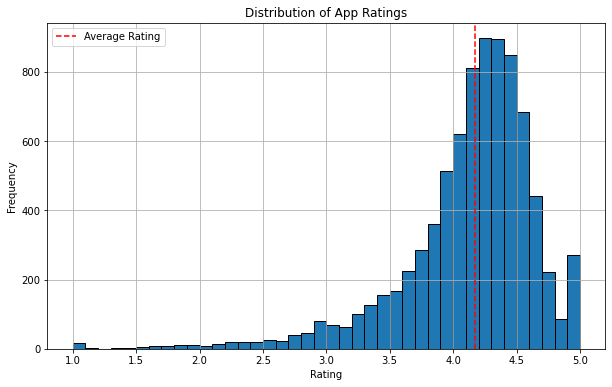

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Average rating of apps
avg_app_rating = apps['Rating'].mean()
print('Average app rating = ', avg_app_rating)

# Distribution of apps according to their ratings
plt.figure(figsize=(10, 6))
plt.hist(apps['Rating'], bins=np.arange(1, 5.1, 0.1), edgecolor='black')
plt.title('Distribution of App Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')

# Vertical dashed line to indicate the average app rating
plt.axvline(x=avg_app_rating, color='red', linestyle='--', label='Average Rating')

plt.legend()
plt.grid(True)
plt.show()

### Size and price of an app
    Let's analyze app size and price to devise effective strategies. Large app sizes can deter users due to download difficulties and limited device storage. Similarly, pricing affects user perception, especially in developing markets.

    Key questions to consider:

    Does app size impact rating?
    Are users inclined towards lightweight apps?
    How does app pricing correlate with rating?
    Are free apps preferred over paid ones?
    
    Our findings suggest that top-rated apps (rating > 4) typically range from 2 MB to 20 MB, and most apps are priced below $10 Understanding these dynamics can inform app development and pricing strategies to enhance user experience and market competitivenes

float64


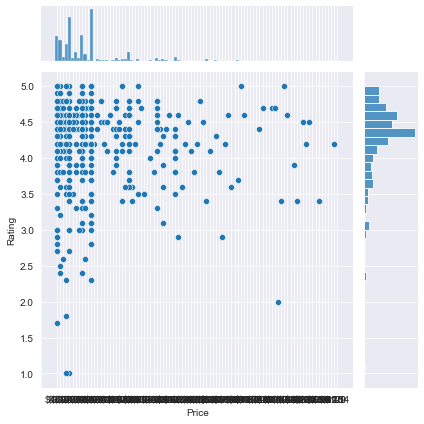

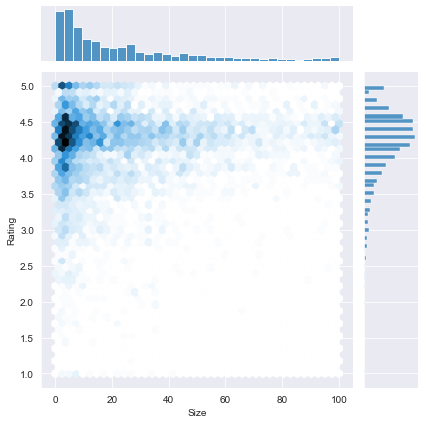

In [8]:
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")
import warnings
warnings.filterwarnings("ignore")

# Subset for categories with at least 250 apps
large_categories = apps.groupby('Category').filter(lambda x: len(x) >= 250).reset_index()

# Plot size vs.
large_categories['Size'] = large_categories['Size'].astype(float)

# Subset out apps whose type is 'Paid'
paid_apps = apps[apps['Type'] == 'Paid']

# Plot price vs. rating
plt2 = sns.jointplot(x = paid_apps['Price'], y = paid_apps['Rating'])
print(large_categories['Size'].dtype)
large_categories['Size'] = large_categories['Size'].astype(float)
plt1 = sns.jointplot(x = large_categories['Size'], y = large_categories['Rating'], kind = 'hex')


### Relation between app category and app price

,Category,App,Price
3327,FAMILY,most expensive app (H),399.99
3465,LIFESTYLE,💎 I'm rich,399.99
3469,LIFESTYLE,I'm Rich - Trump Edition,400.00
4396,LIFESTYLE,I am rich,399.99
4398,FAMILY,I am Rich Plus,399.99
4399,LIFESTYLE,I am rich VIP,299.99
4400,FINANCE,I Am Rich Premium,399.99
4401,LIFESTYLE,I am extremely Rich,379.99
4402,FINANCE,I am Rich!,399.99
4403,FINANCE,I am rich(premium),399.99


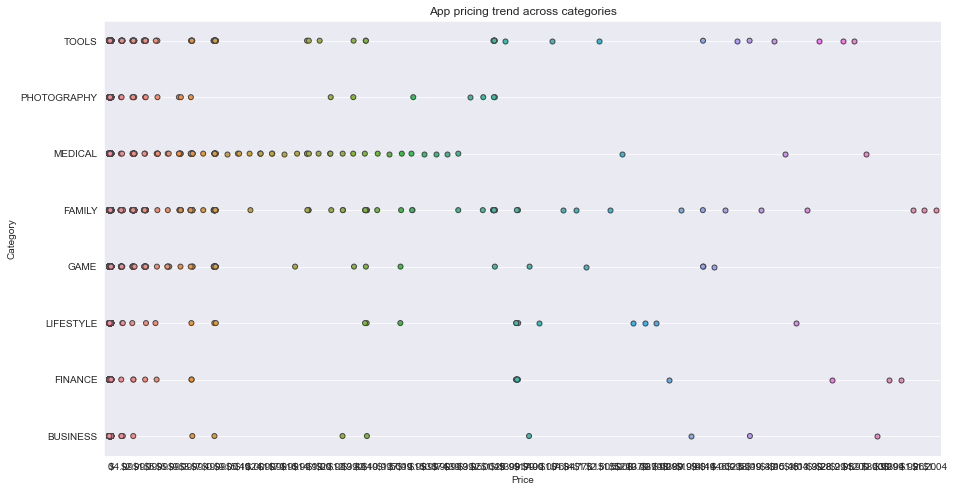

In [9]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

# Select a few popular app categories
popular_app_cats = apps[apps.Category.isin(['GAME', 'FAMILY', 'PHOTOGRAPHY',
                                            'MEDICAL', 'TOOLS', 'FINANCE',
                                            'LIFESTYLE','BUSINESS'])]

# Examine the price trend by plotting Price vs Category
ax = sns.stripplot(x = popular_app_cats['Price'], y = popular_app_cats['Category'], jitter=True, linewidth=1)
ax.set_title('App pricing trend across categories')

# Convert the 'Price' column to float
popular_app_cats['Price'] = popular_app_cats['Price'].str.replace('$', '').astype(float)

# Apps whose Price is greater than 200
apps_above_200 = popular_app_cats[['Category', 'App', 'Price']][popular_app_cats['Price'] > 200]
apps_above_200

### Filter out "junk" apps
Many highly-priced apps may be considered "junk" apps—lacking genuine utility and potentially created as jokes or for malicious intent. Examples include apps like "I Am Rich Premium" or "Most Expensive App (H)." Filtering out these apps provides a clearer visualization of apps priced under $20, facilitating better analysis.

Text(0.5, 1.0, 'App pricing trend across categories after filtering for junk apps')

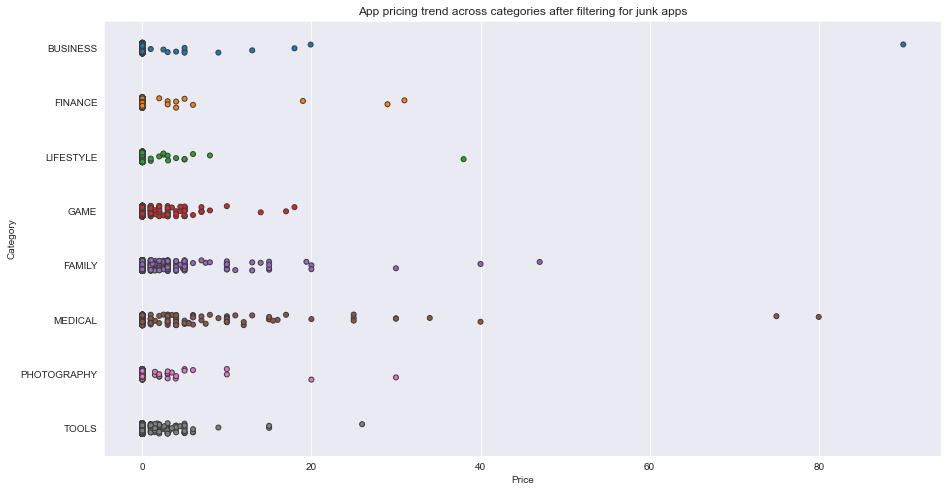

In [10]:
# Select apps priced below $100
apps_under_100 = popular_app_cats[popular_app_cats['Price'] < 100]

fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

# Examine price vs category with the authentic apps
ax = sns.stripplot(x = 'Price', y = 'Category', data=apps_under_100,
                   jitter=True, linewidth=1)
ax.set_title('App pricing trend across categories after filtering for junk apps')

### Popularity of paid apps vs free apps
Free apps are typically ad-supported and serve as extensions of companies' products, aiding in customer retention and communication. Paid apps require upfront payment and lack trial periods. Surprisingly, paid apps have fewer installs compared to free apps, although the disparity isn't as pronounced as expected.

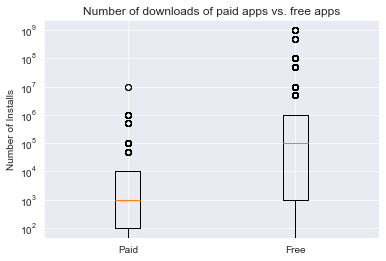

In [11]:
# Sample data (replace this with your actual data)
paid_installs = apps[apps['Type'] == 'Paid']['Installs']
free_installs = apps[apps['Type'] == 'Free']['Installs']

# Remove any NaN values
paid_installs = paid_installs.dropna()
free_installs = free_installs.dropna()

# Convert data to numeric type
paid_installs = pd.to_numeric(paid_installs, errors='coerce')
free_installs = pd.to_numeric(free_installs, errors='coerce')

# Create a figure and axis object
fig, ax = plt.subplots()

# Create boxplots
box = ax.boxplot([paid_installs, free_installs], labels=['Paid', 'Free'])

# Set log scale for y-axis
ax.set_yscale('log')

# Set title and labels
ax.set_title('Number of downloads of paid apps vs. free apps')
ax.set_ylabel('Number of Installs')

# Show the plot
plt.show()

### Sentiment analysis of user reviews
Sentiment analysis of user reviews provides valuable insights into app perception. Comparing sentiment polarity scores between paid and free apps reveals trends: free apps often receive harsh comments, while paid apps seldom receive extremely negative reviews. This suggests that paid apps may generally offer higher quality. Our analysis of over ten thousand Google Play Store apps offers actionable insights for future app development endeavors.

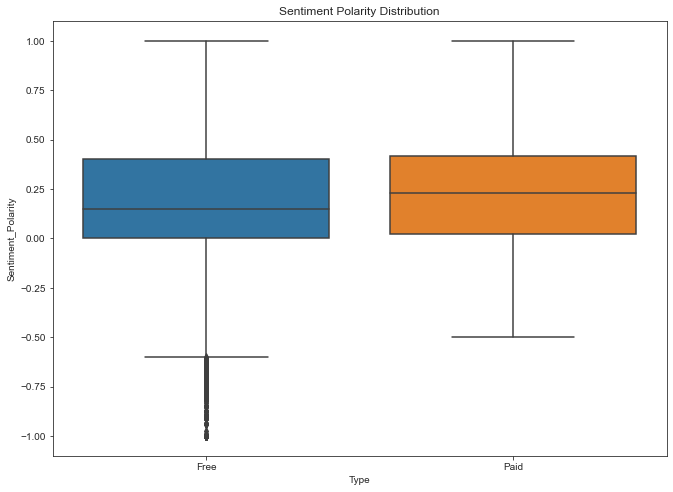

In [12]:
# Load user_reviews.csv
df2=pd.read_csv("user_reviews.csv")

# Join and merge the two dataframes
merged_df = pd.merge(apps, df2, on='App', how='inner')

# Drop NA values from Sentiment and Translated_Review columns
merged_df = merged_df.dropna(subset=['Sentiment', 'Translated_Review'])

# Set the style
sns.set_style('ticks')

# Create a figure and axis object
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)

# User review sentiment polarity for paid vs. free apps
sns.boxplot(x='Type', y='Sentiment_Polarity', data=merged_df, ax=ax)
ax.set_title('Sentiment Polarity Distribution')

# Show the plot
plt.show()

### Visualizing App Categories:
This code creates a countplot to visualize the number of apps per category in a dataset. It sets a darkgrid style, defines the plot size, generates the countplot, and sets titles and labels before displaying the plot.

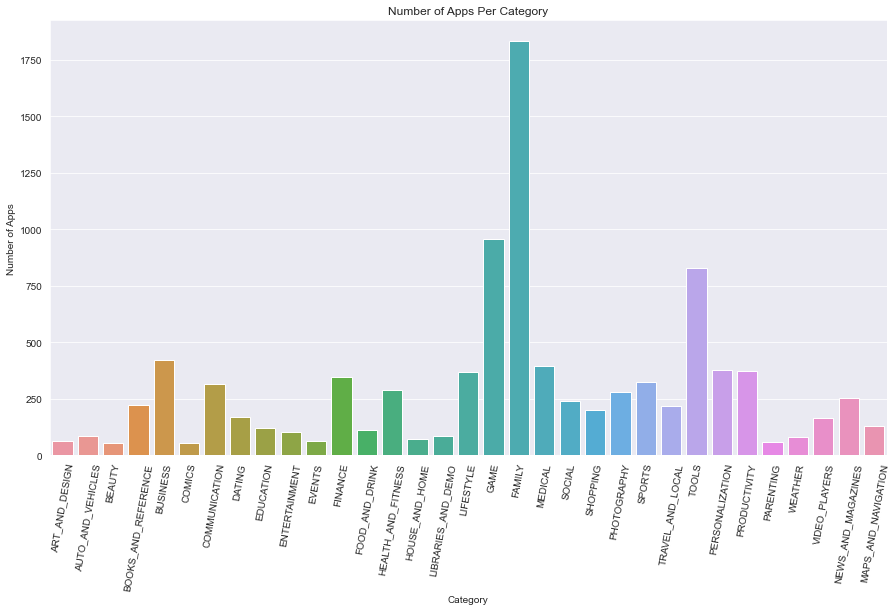

In [13]:
# Set the style
sns.set_style('darkgrid')

# Create the figure and axis object
plt.figure(figsize=(15, 8))

# Generate the countplot
sns.countplot(x='Category', data=df)

# Set the title and axis labels
plt.title('Number of Apps Per Category')
plt.xticks(rotation=80)
plt.ylabel('Number of Apps')

# Show the plot
plt.show()

### Conclusion
The Google Play Store Apps report reveals several key insights:

a) Top 10 highest-rated apps across categories.

b) Distribution of applications across different categories.

c) Top 10 apps with the highest number of downloads.

d) Analysis of the lowest and highest-rated apps within the 'FAMILY' category.

e) Comparison between free and paid apps.

f) Relationship between app category and price.

The visualizations indicate that trending apps often belong to categories like GAME, COMMUNICATION, and TOOL, despite fewer available apps in these categories compared to FAMILY. This suggests a focus on quality over quantity by developers. Additionally, apps with high ratings tend to have a large number of reviews and installations, particularly in categories like SOCIAL and GAME, exemplified by apps like Instagram and Clash of Clans. While there are spikes in size and price, they appear to be outliers rather than the norm.